## Project


### Importaciones


In [4]:
import pandas as pd

Lectura del data set (se necesito separar por ; para su correcta lectura)

In [5]:
covid = pd.read_csv("Datos interesantes/Casos_positivos_de_COVID-19_en_Colombia._20250112.csv", sep=";",low_memory=False)
covid.head()

,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,...,Código ISO del país,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
0,2020-12-24 00:00:00,"1,556,979",2020-12-22 00:00:00,76,VALLE,"76,001",CALI,67,1,F,...,NaN,NaN,Recuperado,2020-12-21 00:00:00,NaN,2020-12-23 00:00:00,2021-01-04 00:00:00,Tiempo,6.0,NaN
1,2020-12-24 00:00:00,"1,556,980",2020-12-19 00:00:00,76,VALLE,"76,001",CALI,66,1,F,...,NaN,NaN,Recuperado,2020-12-07 00:00:00,NaN,2020-12-23 00:00:00,2020-12-25 00:00:00,Tiempo,6.0,NaN
2,2020-12-24 00:00:00,"1,556,981",2020-12-19 00:00:00,76,VALLE,"76,001",CALI,68,1,F,...,NaN,NaN,Recuperado,2020-12-18 00:00:00,NaN,2020-12-22 00:00:00,2021-01-01 00:00:00,Tiempo,6.0,NaN
3,2020-12-24 00:00:00,"1,556,982",2020-12-22 00:00:00,76,VALLE,"76,001",CALI,74,1,F,...,NaN,NaN,Fallecido,2020-12-17 00:00:00,2020-12-30 00:00:00,2020-12-23 00:00:00,NaN,NaN,6.0,NaN
4,2020-12-24 00:00:00,"1,556,983",2020-12-22 00:00:00,76,VALLE,"76,001",CALI,65,1,F,...,NaN,NaN,Recuperado,2020-12-21 00:00:00,NaN,2020-12-23 00:00:00,2021-01-04 00:00:00,Tiempo,6.0,NaN


Información de las variables

In [6]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6390971 entries, 0 to 6390970
Data columns (total 23 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   fecha reporte web             object 
 1   ID de caso                    object 
 2   Fecha de notificación         object 
 3   Código DIVIPOLA departamento  object 
 4   Nombre departamento           object 
 5   Código DIVIPOLA municipio     object 
 6   Nombre municipio              object 
 7   Edad                          int64  
 8   Unidad de medida de edad      int64  
 9   Sexo                          object 
 10  Tipo de contagio              object 
 11  Ubicación del caso            object 
 12  Estado                        object 
 13  Código ISO del país           object 
 14  Nombre del país               object 
 15  Recuperado                    object 
 16  Fecha de inicio de síntomas   object 
 17  Fecha de muerte               object 
 18  Fecha de diagnóstico  

### **Inicio proceso de limpieza**
Eliminación de duplicados

In [7]:
duplicados = covid.duplicated()
covid = covid.drop_duplicates()
covid.isna().sum()

fecha reporte web                     0
ID de caso                            0
Fecha de notificación                 0
Código DIVIPOLA departamento          0
Nombre departamento                   0
Código DIVIPOLA municipio             0
Nombre municipio                      0
Edad                                  0
Unidad de medida de edad              0
Sexo                                  0
Tipo de contagio                      0
Ubicación del caso                41268
Estado                            41268
Código ISO del país             6387261
Nombre del país                 6387253
Recuperado                        36327
Fecha de inicio de síntomas      505384
Fecha de muerte                 6206578
Fecha de diagnóstico               2755
Fecha de recuperación            182324
Tipo de recuperación             182398
Pertenencia étnica                 2156
Nombre del grupo étnico         6307107
dtype: int64

Transformación del tipo de variables de fecha a datetime

In [8]:
covid['Fecha de inicio de síntomas'] = pd.to_datetime(covid['Fecha de inicio de síntomas'], errors='coerce')
covid['Fecha de diagnóstico'] = pd.to_datetime(covid['Fecha de diagnóstico'], errors='coerce')
covid['Fecha de muerte'] = pd.to_datetime(covid['Fecha de muerte'], errors='coerce')
covid['Fecha de recuperación'] = pd.to_datetime(covid['Fecha de recuperación'], errors='coerce')

Creación de nuevas variables para contestar las preguntas de negocio

In [9]:
covid['sobrevivio'] = covid['Fecha de muerte'].isna().astype(int)
covid['dias_diagnostico'] = (covid['Fecha de diagnóstico'] - covid['Fecha de inicio de síntomas']).dt.days
analisis = covid[['dias_diagnostico', 'sobrevivio']].dropna()

In [10]:
columns_with_missing = covid.isna().sum()[covid.isna().sum() > 0]
columns_with_missing.sort_values(ascending=False)

Código ISO del país            6387261
Nombre del país                6387253
Nombre del grupo étnico        6307107
Fecha de muerte                6206578
dias_diagnostico                508037
Fecha de inicio de síntomas     505384
Tipo de recuperación            182398
Fecha de recuperación           182324
Ubicación del caso               41268
Estado                           41268
Recuperado                       36327
Fecha de diagnóstico              2755
Pertenencia étnica                2156
dtype: int64

In [11]:
threshold_colum = len(covid) * 0.3
cols_to_drop = covid.columns[covid.isna().sum() > threshold_colum]
cols_to_drop = cols_to_drop.append(pd.Index(['ID de caso']))
print(cols_to_drop)

Index(['Código ISO del país', 'Nombre del país', 'Fecha de muerte',
       'Nombre del grupo étnico', 'ID de caso'],
      dtype='object')


In [12]:
covid.drop(columns=cols_to_drop, inplace=True)

In [13]:
missing_values_after_drop = covid.isnull().sum()
columns_with_missing_after_drop = missing_values_after_drop[missing_values_after_drop > 0]
columns_with_missing_after_drop 

Ubicación del caso              41268
Estado                          41268
Recuperado                      36327
Fecha de inicio de síntomas    505384
Fecha de diagnóstico             2755
Fecha de recuperación          182324
Tipo de recuperación           182398
Pertenencia étnica               2156
dias_diagnostico               508037
dtype: int64

In [14]:
categorical_columns = ['Ubicación del caso', 'Estado', 'Recuperado', 'Fecha de recuperación', 'Tipo de recuperación']
for col in categorical_columns:
    covid[col] = covid[col].fillna(covid[col].mode()[0])

Eliminar variables redundantes


In [15]:
covid = covid.drop(columns=["Código DIVIPOLA departamento","Código DIVIPOLA municipio"])

In [16]:
covid.head()

,fecha reporte web,Fecha de notificación,Nombre departamento,Nombre municipio,Edad,Unidad de medida de edad,Sexo,Tipo de contagio,Ubicación del caso,Estado,Recuperado,Fecha de inicio de síntomas,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,sobrevivio,dias_diagnostico
0,2020-12-24 00:00:00,2020-12-22 00:00:00,VALLE,CALI,67,1,F,Comunitaria,Casa,Leve,Recuperado,2020-12-21,2020-12-23,2021-01-04,Tiempo,6.0,1,2.0
1,2020-12-24 00:00:00,2020-12-19 00:00:00,VALLE,CALI,66,1,F,Comunitaria,Casa,Leve,Recuperado,2020-12-07,2020-12-23,2020-12-25,Tiempo,6.0,1,16.0
2,2020-12-24 00:00:00,2020-12-19 00:00:00,VALLE,CALI,68,1,F,Comunitaria,Casa,Leve,Recuperado,2020-12-18,2020-12-22,2021-01-01,Tiempo,6.0,1,4.0
3,2020-12-24 00:00:00,2020-12-22 00:00:00,VALLE,CALI,74,1,F,Comunitaria,Fallecido,Fallecido,Fallecido,2020-12-17,2020-12-23,2021-06-15,Tiempo,6.0,0,6.0
4,2020-12-24 00:00:00,2020-12-22 00:00:00,VALLE,CALI,65,1,F,Comunitaria,Casa,Leve,Recuperado,2020-12-21,2020-12-23,2021-01-04,Tiempo,6.0,1,2.0


## modelo

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.impute import SimpleImputer
import statsmodels.api as sm


# Preparación para Pregunta 1: Ubicación vs Supervivencia
covid_filtered = covid.dropna(subset=['sobrevivio', 'Ubicación del caso'])
print(f"Registros disponibles para análisis de ubicación: {len(covid_filtered)}")

# Verificar distribución de supervivencia por ubicación
ubicacion_counts = covid_filtered.groupby('Ubicación del caso')['sobrevivio'].agg(['mean', 'count'])
print("Distribución de supervivencia por ubicación:")
print(ubicacion_counts)

# Filtrar ubicaciones con pocos registros o resultados sospechosos
min_samples = 30  # Mínimo de muestras para considerar una ubicación
ubicaciones_validas = ubicacion_counts[ubicacion_counts['count'] >= min_samples].index
covid_filtered = covid_filtered[covid_filtered['Ubicación del caso'].isin(ubicaciones_validas)]
print(f"Registros después de filtrar ubicaciones poco frecuentes: {len(covid_filtered)}")

# Preparación de datos para modelado
X_ubicacion = covid_filtered['Ubicación del caso']
y_ubicacion = covid_filtered['sobrevivio']

# Crear pipeline con validación cruzada para modelo de ubicación
ubicacion_pipeline = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore')),
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('model', LogisticRegression(max_iter=1000, class_weight='balanced'))
])

# Dividir datos en entrenamiento y prueba
X_ubicacion_train, X_ubicacion_test, y_ubicacion_train, y_ubicacion_test = train_test_split(
    X_ubicacion.values.reshape(-1, 1), y_ubicacion, test_size=0.2, random_state=42, stratify=y_ubicacion if len(set(y_ubicacion)) > 1 else None
)

# Entrenar modelo de ubicación
ubicacion_pipeline.fit(X_ubicacion_train, y_ubicacion_train)

# Evaluación del modelo de ubicación
if len(set(y_ubicacion)) > 1:  # Solo si hay más de una clase
    y_ubicacion_pred = ubicacion_pipeline.predict(X_ubicacion_test)
    print("\nEvaluación del modelo de ubicación:")
    print(f"Accuracy: {accuracy_score(y_ubicacion_test, y_ubicacion_pred):.4f}")
    print("\nInforme de clasificación:")
    print(classification_report(y_ubicacion_test, y_ubicacion_pred))

# Análisis para Pregunta 2: Tiempo de diagnóstico vs Supervivencia
covid_tiempo = covid.dropna(subset=['sobrevivio', 'dias_diagnostico'])
covid_tiempo = covid_tiempo[covid_tiempo['dias_diagnostico'] >= 0]  # Solo días positivos
covid_tiempo = covid_tiempo[covid_tiempo['dias_diagnostico'] <= 30]  # Limitar a valores razonables
print(f"\nRegistros disponibles para análisis de tiempo de diagnóstico: {len(covid_tiempo)}")

# Verificar distribución de supervivencia por tiempo de diagnóstico
bins = [0, 3, 7, 14, 30]
covid_tiempo['grupo_dias'] = pd.cut(covid_tiempo['dias_diagnostico'], bins)
tiempo_counts = covid_tiempo.groupby('grupo_dias')['sobrevivio'].agg(['mean', 'count'])
print("Distribución de supervivencia por tiempo de diagnóstico:")
print(tiempo_counts)

# Preparación para modelo multivariable
X_tiempo_vars = ['dias_diagnostico', 'Edad']
X_tiempo_multi = covid_tiempo[X_tiempo_vars]
y_tiempo = covid_tiempo['sobrevivio']

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_tiempo_multi, y_tiempo, test_size=0.2, random_state=42, stratify=y_tiempo if len(set(y_tiempo)) > 1 else None
)

# Pipeline multivariable para tiempo de diagnóstico
tiempo_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(class_weight='balanced', max_iter=1000))
])

# Entrenar modelo con validación cruzada
if len(set(y_tiempo)) > 1:  # Solo si hay más de una clase
    cv_scores = cross_val_score(tiempo_pipeline, X_tiempo_multi, y_tiempo, cv=5, scoring='roc_auc')
    print(f"\nROC-AUC con validación cruzada: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# Entrenar modelo final
tiempo_pipeline.fit(X_train, y_train)

# Evaluación del modelo de tiempo
if len(set(y_tiempo)) > 1:  # Solo si hay más de una clase
    y_pred = tiempo_pipeline.predict(X_test)
    y_prob = tiempo_pipeline.predict_proba(X_test)[:,1]
    
    print("\nEvaluación del modelo de tiempo de diagnóstico:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"ROC-AUC: {roc_auc_score(y_test, y_prob):.4f}")
    print("\nInforme de clasificación:")
    print(classification_report(y_test, y_pred))

# Análisis estadístico con intervalos de confianza
print("\nAnálisis estadístico con intervalos de confianza:")
X_sm = sm.add_constant(covid_tiempo['dias_diagnostico'])
modelo_sm = sm.Logit(y_tiempo, X_sm)
resultados = modelo_sm.fit(disp=0)  # disp=0 para suprimir mensajes de convergencia
print(resultados.summary2().tables[1])

# Extraer coeficiente para días de diagnóstico
coef_tiempo = tiempo_pipeline.named_steps['model'].coef_[0][0]
odds_ratio = np.exp(coef_tiempo)
print(f"\nCoeficiente para días de diagnóstico: {coef_tiempo:.4f}")
print(f"Odds ratio: {odds_ratio:.4f}")

Registros disponibles para análisis de ubicación: 6390971
Distribución de supervivencia por ubicación:
                        mean    count
Ubicación del caso                   
CASA                1.000000        7
Casa                0.993364  6218349
Fallecido           0.000000   143125
Hospital            1.000000     1056
Hospital UCI        1.000000      106
casa                1.000000    28328
Registros después de filtrar ubicaciones poco frecuentes: 6390964

Evaluación del modelo de ubicación:
Accuracy: 0.9934

Informe de clasificación:
              precision    recall  f1-score   support

           0       1.00      0.77      0.87     36879
           1       0.99      1.00      1.00   1241314

    accuracy                           0.99   1278193
   macro avg       1.00      0.89      0.93   1278193
weighted avg       0.99      0.99      0.99   1278193

Registros disponibles para análisis de tiempo de diagnóstico: 5871097


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17176\418998528.py:65: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tiempo_counts = covid_tiempo.groupby('grupo_dias')['sobrevivio'].agg(['mean', 'count'])


Distribución de supervivencia por tiempo de diagnóstico:
                mean    count
grupo_dias                   
(0, 3]      0.976886   974080
(3, 7]      0.968633  1831272
(7, 14]     0.963596  1518358
(14, 30]    0.967838  1272913

ROC-AUC con validación cruzada: 0.8813 ± 0.0107

Evaluación del modelo de tiempo de diagnóstico:
Accuracy: 0.7924
ROC-AUC: 0.8809

Informe de clasificación:
              precision    recall  f1-score   support

           0       0.11      0.82      0.20     36468
           1       0.99      0.79      0.88   1137752

    accuracy                           0.79   1174220
   macro avg       0.55      0.81      0.54   1174220
weighted avg       0.97      0.79      0.86   1174220


Análisis estadístico con intervalos de confianza:
                     Coef.  Std.Err.           z  P>|z|    [0.025    0.975]
const             3.607253  0.004407  818.501413    0.0  3.598615  3.615891
dias_diagnostico -0.019382  0.000417  -46.516367    0.0 -0.020199 -0.018566

In [18]:
# Interpretación de resultados
print("\nRESULTADOS:")

print("\n1. ¿Cómo influye la ubicación de la persona en su supervivencia al COVID-19?")
for ubicacion, stats in ubicacion_counts.sort_values('mean').iterrows():
    tasa = stats['mean']
    n = stats['count']
    error = 1.96 * np.sqrt((tasa * (1-tasa)) / n)  # Intervalo de confianza 95%
    print(f"   - {ubicacion}: {tasa:.2%} tasa de supervivencia (n={n}, IC 95%: {max(0, tasa-error):.2%} - {min(1, tasa+error):.2%})")

print("\n2. ¿Cuán rápido se ha de tratar a un enfermo de COVID-19 para aumentar su posibilidad de sobrevivir?")
if coef_tiempo < 0:
    # Obtener intervalo de confianza del modelo statsmodels
    ci = resultados.conf_int()
    lower_ci = np.exp(ci.iloc[1, 0])
    upper_ci = np.exp(ci.iloc[1, 1])
    
    print(f"   Cada día adicional entre síntomas y diagnóstico REDUCE la probabilidad de supervivencia.")
    print(f"   Odds ratio: {odds_ratio:.4f} (IC 95%: {lower_ci:.4f} - {upper_ci:.4f})")
    print(f"   Por cada día de retraso, las probabilidades de supervivencia se multiplican por {odds_ratio:.4f}")
    
    # Calcular punto crítico (días donde la probabilidad baja del 90%)
    umbral_prob = 0.9
    prob_inicial = tiempo_pipeline.predict_proba(np.array([[0, covid_tiempo['Edad'].median()]]))[0, 1]
    
    if prob_inicial > umbral_prob:
        # Calcular días para llegar al umbral
        dias_criticos = np.log(umbral_prob/(1-umbral_prob)) - np.log(prob_inicial/(1-prob_inicial))
        dias_criticos = dias_criticos / coef_tiempo
        print(f"   Un retraso de aproximadamente {abs(dias_criticos):.1f} días reduce la probabilidad de supervivencia por debajo del {umbral_prob*100:.0f}%")
else:
    print(f"   Los días entre síntomas y diagnóstico no muestran un impacto negativo significativo en este conjunto de datos.")


RESULTADOS:

1. ¿Cómo influye la ubicación de la persona en su supervivencia al COVID-19?
   - Fallecido: 0.00% tasa de supervivencia (n=143125.0, IC 95%: 0.00% - 0.00%)
   - Casa: 99.34% tasa de supervivencia (n=6218349.0, IC 95%: 99.33% - 99.34%)
   - CASA: 100.00% tasa de supervivencia (n=7.0, IC 95%: 100.00% - 100.00%)
   - Hospital: 100.00% tasa de supervivencia (n=1056.0, IC 95%: 100.00% - 100.00%)
   - Hospital UCI: 100.00% tasa de supervivencia (n=106.0, IC 95%: 100.00% - 100.00%)
   - casa: 100.00% tasa de supervivencia (n=28328.0, IC 95%: 100.00% - 100.00%)

2. ¿Cuán rápido se ha de tratar a un enfermo de COVID-19 para aumentar su posibilidad de sobrevivir?
   Cada día adicional entre síntomas y diagnóstico REDUCE la probabilidad de supervivencia.
   Odds ratio: 0.8837 (IC 95%: 0.9800 - 0.9816)
   Por cada día de retraso, las probabilidades de supervivencia se multiplican por 0.8837


C:\Users\LENOVO\Documents\Trabajos U.sabana\7sem\Analitica\Corte1\ETL\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


===== EVALUACIÓN DE SOBREAJUSTE DE MODELOS =====


1. MODELO: UBICACIÓN VS SUPERVIVENCIA


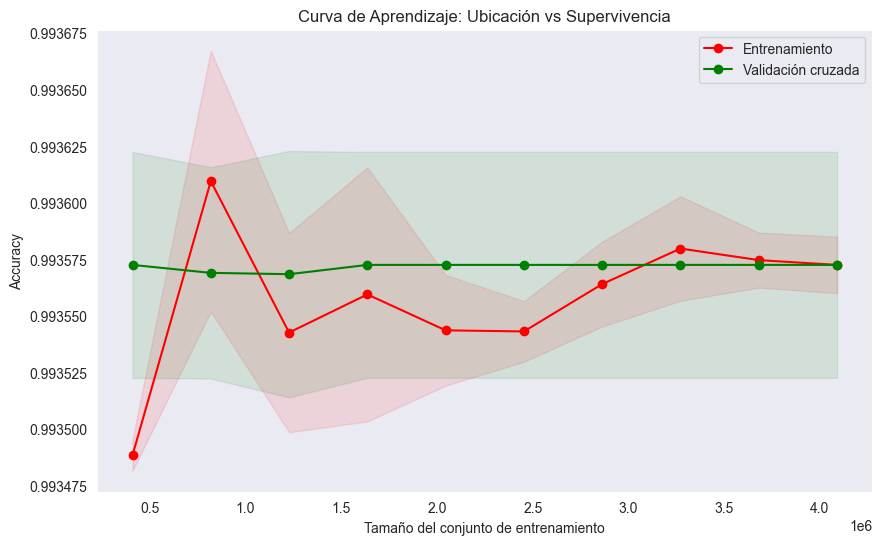

Accuracy en entrenamiento: 0.9936
Accuracy en prueba: 0.9934
Diferencia (indicador de sobreajuste): 0.0001
✓ NO HAY EVIDENCIA DE SOBREAJUSTE: El modelo generaliza bien a los datos de prueba


2. MODELO: TIEMPO DE DIAGNÓSTICO VS SUPERVIVENCIA


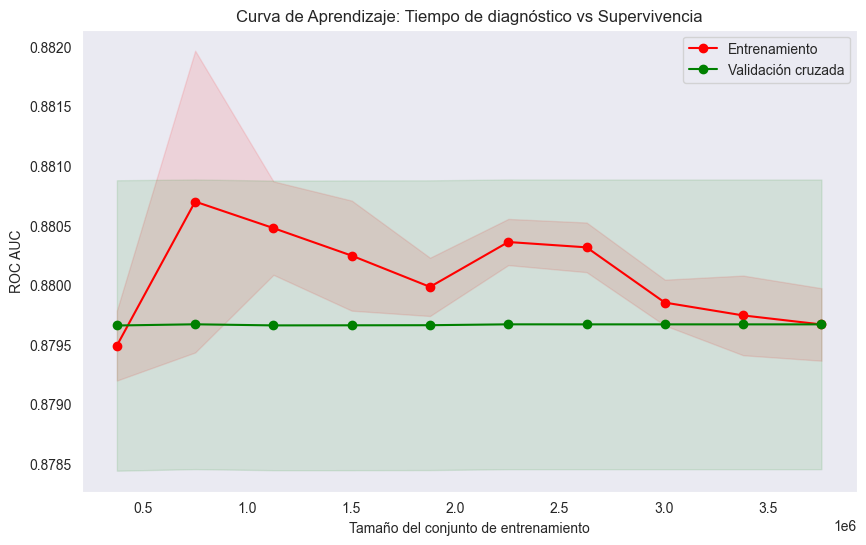

ROC AUC en entrenamiento: 0.8797
ROC AUC en prueba: 0.8809
Diferencia (indicador de sobreajuste): 0.0012
✓ NO HAY EVIDENCIA DE SOBREAJUSTE: El modelo generaliza bien a los datos de prueba


3. VALIDACIÓN CRUZADA Y PRUEBAS ESTADÍSTICAS
Modelo de ubicación - CV (5-fold) accuracy: 0.9935 ± 0.0001
Modelo de tiempo - CV (5-fold) ROC AUC: 0.8799 ± 0.0009

Prueba de permutación para el modelo de tiempo de diagnóstico
ROC AUC score del modelo real: 0.8799
ROC AUC score promedio con labels permutados: 0.5001
P-value: 0.0099
✓ El modelo es significativamente mejor que un modelo aleatorio (p < 0.05)


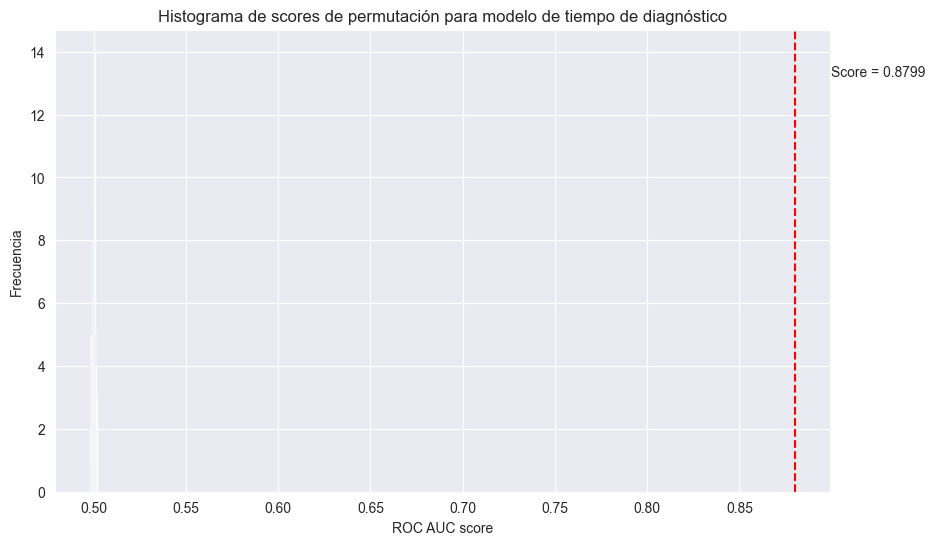



4. ANÁLISIS DE RESIDUOS


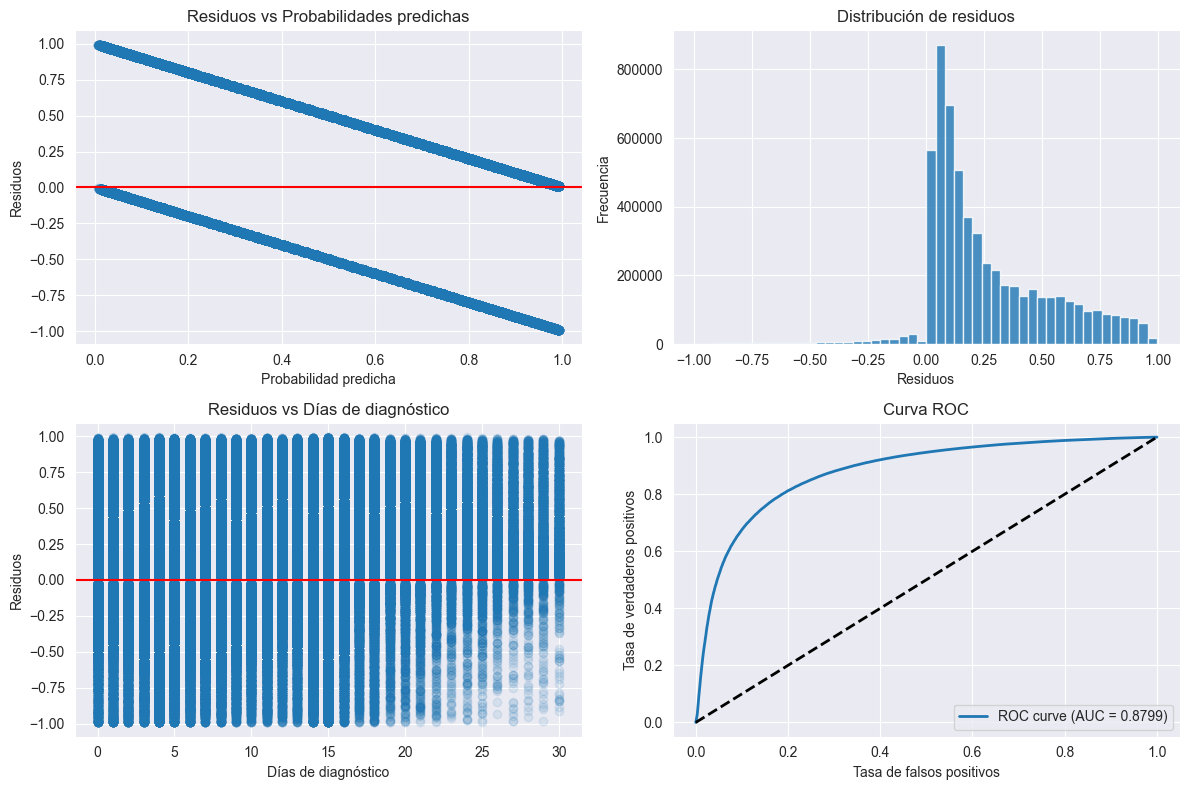



5. EVALUACIÓN DE COMPLEJIDAD DEL MODELO


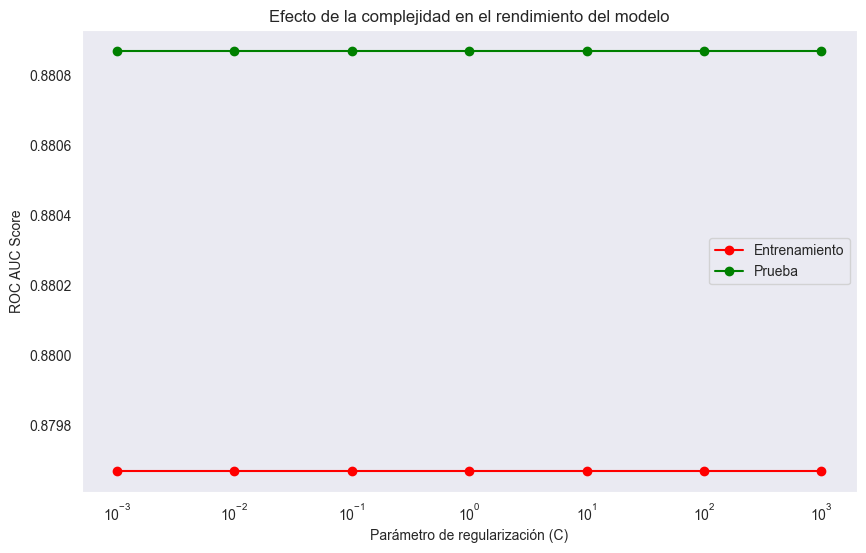

Mejor valor de regularización C: 0.001
ROC AUC con el mejor C - Entrenamiento: 0.8797, Prueba: 0.8809


===== CONCLUSIÓN =====
✓ Los modelos no muestran evidencia significativa de sobreajuste.
   Los modelos generalizan bien a los datos no vistos y son adecuados para el análisis.


In [19]:
# Evaluación de sobreajuste de modelos
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, train_test_split, cross_val_score, KFold, StratifiedKFold, permutation_test_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns

print("===== EVALUACIÓN DE SOBREAJUSTE DE MODELOS =====")

# 1. Modelo de ubicación vs supervivencia
print("\n\n1. MODELO: UBICACIÓN VS SUPERVIVENCIA")
covid_ubicacion = covid.dropna(subset=['sobrevivio', 'Ubicación del caso'])

# Filtrar ubicaciones poco frecuentes
ubicacion_counts = covid_ubicacion.groupby('Ubicación del caso')['sobrevivio'].agg(['mean', 'count'])
min_samples = 30
ubicaciones_validas = ubicacion_counts[ubicacion_counts['count'] >= min_samples].index
covid_ubicacion = covid_ubicacion[covid_ubicacion['Ubicación del caso'].isin(ubicaciones_validas)]

X_ubicacion = covid_ubicacion['Ubicación del caso'].values.reshape(-1, 1)
y_ubicacion = covid_ubicacion['sobrevivio']

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(
    X_ubicacion, y_ubicacion, test_size=0.2, random_state=42, stratify=y_ubicacion
)

# Crear pipeline
ubicacion_pipeline = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore')),
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('model', LogisticRegression(max_iter=1000, class_weight='balanced'))
])

# Curvas de aprendizaje para detectar sobreajuste
train_sizes, train_scores, test_scores = learning_curve(
    ubicacion_pipeline, X_train, y_train, 
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5, scoring='accuracy', n_jobs=-1
)

# Calcular medias y desviaciones estándar
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Graficar curva de aprendizaje
plt.figure(figsize=(10, 6))
plt.title("Curva de Aprendizaje: Ubicación vs Supervivencia")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Accuracy")
plt.grid()

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Entrenamiento")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Validación cruzada")

plt.legend(loc="best")
plt.show()

# Validación con datos de prueba
ubicacion_pipeline.fit(X_train, y_train)
train_acc = ubicacion_pipeline.score(X_train, y_train)
test_acc = ubicacion_pipeline.score(X_test, y_test)

print(f"Accuracy en entrenamiento: {train_acc:.4f}")
print(f"Accuracy en prueba: {test_acc:.4f}")
print(f"Diferencia (indicador de sobreajuste): {abs(train_acc - test_acc):.4f}")

if abs(train_acc - test_acc) > 0.05:
    print("⚠️ POSIBLE SOBREAJUSTE: La diferencia entre la precisión de entrenamiento y prueba es >5%")
else:
    print("✓ NO HAY EVIDENCIA DE SOBREAJUSTE: El modelo generaliza bien a los datos de prueba")

# 2. Modelo de tiempo de diagnóstico vs supervivencia
print("\n\n2. MODELO: TIEMPO DE DIAGNÓSTICO VS SUPERVIVENCIA")
covid_tiempo = covid.dropna(subset=['sobrevivio', 'dias_diagnostico'])
covid_tiempo = covid_tiempo[covid_tiempo['dias_diagnostico'] >= 0]  # Solo días positivos
covid_tiempo = covid_tiempo[covid_tiempo['dias_diagnostico'] <= 30]  # Limitar a valores razonables

# Preparación para modelo multivariable
X_tiempo_vars = ['dias_diagnostico', 'Edad']
X_tiempo = covid_tiempo[X_tiempo_vars]
y_tiempo = covid_tiempo['sobrevivio']

# División en entrenamiento y prueba
X_train_tiempo, X_test_tiempo, y_train_tiempo, y_test_tiempo = train_test_split(
    X_tiempo, y_tiempo, test_size=0.2, random_state=42, stratify=y_tiempo if len(set(y_tiempo)) > 1 else None
)

# Pipeline multivariable para tiempo de diagnóstico
tiempo_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(class_weight='balanced', max_iter=1000))
])

# Curvas de aprendizaje
train_sizes_tiempo, train_scores_tiempo, test_scores_tiempo = learning_curve(
    tiempo_pipeline, X_train_tiempo, y_train_tiempo, 
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5, scoring='roc_auc', n_jobs=-1
)

# Calcular medias y desviaciones estándar
train_mean_tiempo = np.mean(train_scores_tiempo, axis=1)
train_std_tiempo = np.std(train_scores_tiempo, axis=1)
test_mean_tiempo = np.mean(test_scores_tiempo, axis=1)
test_std_tiempo = np.std(test_scores_tiempo, axis=1)

# Graficar curva de aprendizaje
plt.figure(figsize=(10, 6))
plt.title("Curva de Aprendizaje: Tiempo de diagnóstico vs Supervivencia")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("ROC AUC")
plt.grid()

plt.fill_between(train_sizes_tiempo, train_mean_tiempo - train_std_tiempo, 
                train_mean_tiempo + train_std_tiempo, alpha=0.1, color="r")
plt.fill_between(train_sizes_tiempo, test_mean_tiempo - test_std_tiempo, 
                test_mean_tiempo + test_std_tiempo, alpha=0.1, color="g")
plt.plot(train_sizes_tiempo, train_mean_tiempo, 'o-', color="r", label="Entrenamiento")
plt.plot(train_sizes_tiempo, test_mean_tiempo, 'o-', color="g", label="Validación cruzada")

plt.legend(loc="best")
plt.show()

# Validación con datos de prueba
tiempo_pipeline.fit(X_train_tiempo, y_train_tiempo)

y_train_pred = tiempo_pipeline.predict_proba(X_train_tiempo)[:, 1]
y_test_pred = tiempo_pipeline.predict_proba(X_test_tiempo)[:, 1]

train_roc_auc = roc_auc_score(y_train_tiempo, y_train_pred)
test_roc_auc = roc_auc_score(y_test_tiempo, y_test_pred)

print(f"ROC AUC en entrenamiento: {train_roc_auc:.4f}")
print(f"ROC AUC en prueba: {test_roc_auc:.4f}")
print(f"Diferencia (indicador de sobreajuste): {abs(train_roc_auc - test_roc_auc):.4f}")

if abs(train_roc_auc - test_roc_auc) > 0.05:
    print("⚠️ POSIBLE SOBREAJUSTE: La diferencia entre ROC AUC de entrenamiento y prueba es >5%")
else:
    print("✓ NO HAY EVIDENCIA DE SOBREAJUSTE: El modelo generaliza bien a los datos de prueba")

# 3. Validación cruzada y pruebas de permutación
print("\n\n3. VALIDACIÓN CRUZADA Y PRUEBAS ESTADÍSTICAS")

# Validación cruzada estratificada para el modelo de ubicación
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_ubicacion = cross_val_score(ubicacion_pipeline, X_ubicacion, y_ubicacion, cv=cv, scoring='accuracy')
print(f"Modelo de ubicación - CV (5-fold) accuracy: {cv_scores_ubicacion.mean():.4f} ± {cv_scores_ubicacion.std():.4f}")

# Validación cruzada estratificada para el modelo de tiempo
cv_scores_tiempo = cross_val_score(tiempo_pipeline, X_tiempo, y_tiempo, cv=cv, scoring='roc_auc')
print(f"Modelo de tiempo - CV (5-fold) ROC AUC: {cv_scores_tiempo.mean():.4f} ± {cv_scores_tiempo.std():.4f}")

# Prueba de permutación para el modelo de tiempo
print("\nPrueba de permutación para el modelo de tiempo de diagnóstico")
score_tiempo, perm_scores_tiempo, pvalue_tiempo = permutation_test_score(
    tiempo_pipeline, X_tiempo, y_tiempo, 
    scoring="roc_auc", 
    cv=cv, 
    n_permutations=100,
    n_jobs=-1,
    random_state=42
)

print(f"ROC AUC score del modelo real: {score_tiempo:.4f}")
print(f"ROC AUC score promedio con labels permutados: {perm_scores_tiempo.mean():.4f}")
print(f"P-value: {pvalue_tiempo:.4f}")

if pvalue_tiempo < 0.05:
    print("✓ El modelo es significativamente mejor que un modelo aleatorio (p < 0.05)")
else:
    print("⚠️ No hay evidencia estadística de que el modelo sea mejor que un modelo aleatorio (p >= 0.05)")

# Visualizar distribución de permutaciones
plt.figure(figsize=(10, 6))
plt.hist(perm_scores_tiempo, bins=20, alpha=0.8)
plt.axvline(score_tiempo, ls='--', color='r')
plt.text(score_tiempo + 0.02, plt.ylim()[1] * 0.9, f'Score = {score_tiempo:.4f}')
plt.title('Histograma de scores de permutación para modelo de tiempo de diagnóstico')
plt.xlabel('ROC AUC score')
plt.ylabel('Frecuencia')
plt.show()

# 4. Análisis de residuos
print("\n\n4. ANÁLISIS DE RESIDUOS")

# Obtener probabilidades y residuos para el modelo de tiempo
y_prob = tiempo_pipeline.predict_proba(X_tiempo)[:, 1]
residuos = y_tiempo - y_prob

# Visualizar residuos
plt.figure(figsize=(12, 8))

# Subplot 1: Residuos vs valores predichos
plt.subplot(2, 2, 1)
plt.scatter(y_prob, residuos, alpha=0.1)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Probabilidad predicha')
plt.ylabel('Residuos')
plt.title('Residuos vs Probabilidades predichas')

# Subplot 2: Distribución de residuos
plt.subplot(2, 2, 2)
plt.hist(residuos, bins=50, alpha=0.8)
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Distribución de residuos')

# Subplot 3: Residuos vs días de diagnóstico
plt.subplot(2, 2, 3)
plt.scatter(X_tiempo['dias_diagnostico'], residuos, alpha=0.1)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Días de diagnóstico')
plt.ylabel('Residuos')
plt.title('Residuos vs Días de diagnóstico')

# Subplot 4: Curva ROC
plt.subplot(2, 2, 4)
fpr, tpr, _ = roc_curve(y_tiempo, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

# 5. Evaluación de complejidad del modelo
print("\n\n5. EVALUACIÓN DE COMPLEJIDAD DEL MODELO")

# Para el modelo de tiempo, evaluar diferentes niveles de regularización
C_values = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
train_scores = []
test_scores = []

for C in C_values:
    tiempo_pipeline.set_params(model__C=C)
    tiempo_pipeline.fit(X_train_tiempo, y_train_tiempo)
    
    train_pred = tiempo_pipeline.predict_proba(X_train_tiempo)[:, 1]
    test_pred = tiempo_pipeline.predict_proba(X_test_tiempo)[:, 1]
    
    train_scores.append(roc_auc_score(y_train_tiempo, train_pred))
    test_scores.append(roc_auc_score(y_test_tiempo, test_pred))

# Graficar resultados de complejidad del modelo
plt.figure(figsize=(10, 6))
plt.semilogx(C_values, train_scores, 'o-', label="Entrenamiento", color='r')
plt.semilogx(C_values, test_scores, 'o-', label="Prueba", color='g')
plt.legend()
plt.xlabel("Parámetro de regularización (C)")
plt.ylabel("ROC AUC Score")
plt.title("Efecto de la complejidad en el rendimiento del modelo")
plt.grid()
plt.show()

# Mostrar mejor valor de C
best_c_index = np.argmax(test_scores)
best_c = C_values[best_c_index]
print(f"Mejor valor de regularización C: {best_c}")
print(f"ROC AUC con el mejor C - Entrenamiento: {train_scores[best_c_index]:.4f}, Prueba: {test_scores[best_c_index]:.4f}")

# Conclusión sobre sobreajuste
print("\n\n===== CONCLUSIÓN =====")
if abs(train_acc - test_acc) > 0.05 or abs(train_roc_auc - test_roc_auc) > 0.05:
    print("⚠️ Al menos uno de los modelos muestra signos de sobreajuste.")
    print("   Recomendaciones:")
    print("   1. Aumentar la regularización (disminuir el parámetro C)")
    print("   2. Reducir la complejidad del modelo")
    print("   3. Recopilar más datos si es posible")
else:
    print("✓ Los modelos no muestran evidencia significativa de sobreajuste.")
    print("   Los modelos generalizan bien a los datos no vistos y son adecuados para el análisis.")